# Pandas


**Dataset:** Adult Income Dataset from UCI Machine Learning Repository  - https://archive.ics.uci.edu/dataset/2/adult

### Structure
- **Part 1:** Data Loading and Exploration
- **Part 2:** Data Cleaning and Transformation
- **Part 3:** GroupBy Operations and Aggregations
- **Part 4:** Advanced Analysis with Apply Functions
- **Part 5:** Data Visualization

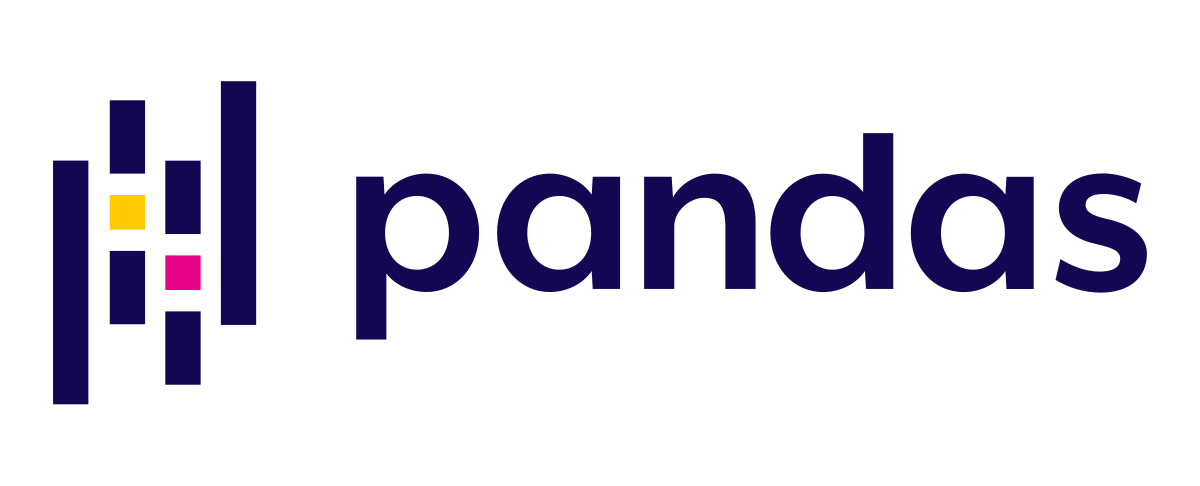

## Part 1: Data Loading and Exploration (15 minutes)

Let's start by importing necessary libraries and loading our dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [3]:
df = pd.read_csv('data/adult.data.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (32561, 15)

First 5 rows:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print("Column Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Missing Values:
age               0
workclass         0
fnlwgt     

In [5]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                      'relationship', 'race', 'sex', 'native-country', 'salary']

for col in categorical_columns:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most common: {df[col].mode().values[0]}")
    if df[col].nunique() < 15:  # Only show value counts for columns with few unique values
        print(f"  Value counts:\n{df[col].value_counts()}")


workclass:
  Unique values: 9
  Most common: Private
  Value counts:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

education:
  Unique values: 16
  Most common: HS-grad

marital-status:
  Unique values: 7
  Most common: Married-civ-spouse
  Value counts:
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

occupation:
  Unique values: 15
  Most common: Prof-specialty

relationship:
  Unique values: 6
  Most common: Husband
  Value counts:
relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife            

## Part 2: Data Cleaning and Transformation

In [6]:
for col in categorical_columns:
    question_mark_count = (df[col] == '?').sum()
    if question_mark_count > 0:
        print(f"Column '{col}' has {question_mark_count} '?' values ({question_mark_count/len(df)*100:.2f}%)")

df_clean = df.replace('?', np.nan)

print("\nMissing values after replacing '?' with NaN:")
print(df_clean.isnull().sum())

Column 'workclass' has 1836 '?' values (5.64%)
Column 'occupation' has 1843 '?' values (5.66%)
Column 'native-country' has 583 '?' values (1.79%)

Missing values after replacing '?' with NaN:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64


In [7]:
df_clean['salary_binary'] = df_clean['salary'].map({'<=50K': 0, '>50K': 1})

bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)

df_clean['hours_category'] = pd.cut(df_clean['hours-per-week'], 
                                   bins=[0, 20, 40, 60, 168], 
                                   labels=['Part-time', 'Full-time', 'Overtime', 'Excessive'])

print("New features created:")
print(f"Salary binary: {df_clean['salary_binary'].value_counts()}")
print(f"Age groups: {df_clean['age_group'].value_counts()}")
print(f"Hours categories: {df_clean['hours_category'].value_counts()}")

New features created:
Salary binary: salary_binary
0    24720
1     7841
Name: count, dtype: int64
Age groups: age_group
26-35    8479
36-45    8151
46-55    5853
18-25    5570
56-65    3172
65+      1336
Name: count, dtype: int64
Hours categories: hours_category
Full-time    20052
Overtime      8471
Part-time     2928
Excessive     1110
Name: count, dtype: int64


## Part 3: GroupBy Operations and Aggregations

In [8]:
education_income = df_clean.groupby('education')['salary_binary'].agg(['mean', 'count'])
education_income = education_income.sort_values('mean', ascending=False)
print("Income rate by education (sorted by highest income rate):")
print(education_income.head(10))

Income rate by education (sorted by highest income rate):
                  mean  count
education                    
Doctorate     0.740920    413
Prof-school   0.734375    576
Masters       0.556587   1723
Bachelors     0.414753   5355
Assoc-voc     0.261216   1382
Assoc-acdm    0.248360   1067
Some-college  0.190235   7291
HS-grad       0.159509  10501
12th          0.076212    433
10th          0.066452    933


In [9]:
edu_sex_income = df_clean.groupby(['education', 'sex'])['salary_binary'].agg(['mean', 'count'])
edu_sex_income = edu_sex_income.sort_values('mean', ascending=False)
print("Income rate by education and sex:")
print(edu_sex_income.head(10))

Income rate by education and sex:
                         mean  count
education    sex                    
Prof-school  Male    0.787190    484
Doctorate    Male    0.782875    327
Masters      Male    0.657119   1187
Doctorate    Female  0.581395     86
Bachelors    Male    0.503747   3736
Prof-school  Female  0.456522     92
Masters      Female  0.333955    536
Assoc-voc    Male    0.333333    882
Assoc-acdm   Male    0.323529    646
Some-college Male    0.265329   4485


In [10]:
occupation_stats = df_clean.groupby('occupation').agg({
    'age': ['mean', 'std', 'min', 'max'],
    'hours-per-week': 'mean',
    'salary_binary': 'mean',
    'education-num': 'mean'
}).round(2)

occupation_stats = occupation_stats.sort_values(('salary_binary', 'mean'), ascending=False)
print("Occupation statistics (sorted by income rate):")
print(occupation_stats)

Occupation statistics (sorted by income rate):
                     age                hours-per-week salary_binary  \
                    mean    std min max           mean          mean   
occupation                                                             
Exec-managerial    42.17  11.97  17  90          44.99          0.48   
Prof-specialty     40.52  12.02  17  90          42.39          0.45   
Protective-serv    38.95  12.82  17  90          42.87          0.33   
Tech-support       37.02  11.32  17  73          39.43          0.30   
Sales              37.35  14.19  17  90          40.78          0.27   
Craft-repair       39.03  11.61  17  90          42.30          0.23   
Transport-moving   40.20  12.45  17  90          44.66          0.20   
Adm-clerical       36.96  13.36  17  90          37.56          0.13   
Farming-fishing    41.21  15.07  17  90          46.99          0.12   
Machine-op-inspct  37.72  12.07  17  90          40.76          0.12   
Armed-Forces     

In [11]:
pivot_income = pd.pivot_table(df_clean, 
                            values='salary_binary', 
                            index='workclass', 
                            columns='education', 
                            aggfunc='mean')

print("Income rate by workclass and education:")
print(pivot_income.round(3))

Income rate by workclass and education:
education          10th   11th   12th  1st-4th  5th-6th  7th-8th    9th  \
workclass                                                                 
Federal-gov       0.000  0.111  0.000      NaN    0.000    0.000  0.333   
Local-gov         0.032  0.056  0.105    0.000    0.111    0.036  0.130   
Never-worked      0.000  0.000    NaN      NaN      NaN    0.000    NaN   
Private           0.068  0.049  0.069    0.037    0.026    0.042  0.047   
Self-emp-inc      0.158  0.286  0.143    0.000    0.500    0.357  0.000   
Self-emp-not-inc  0.104  0.117  0.158    0.077    0.211    0.149  0.118   
State-gov         0.154  0.071  0.200    0.000    0.000    0.000  0.000   
Without-pay         NaN    NaN    NaN      NaN      NaN    0.000    NaN   

education         Assoc-acdm  Assoc-voc  Bachelors  Doctorate  HS-grad  \
workclass                                                                
Federal-gov            0.345      0.395      0.448      0.938

## Part 4: Advanced Analysis with Apply Functions

In [12]:
def categorize_capital_gains(row):
    if row['capital-gain'] == 0:
        return 'No Gain'
    elif row['capital-gain'] < 5000:
        return 'Small Gain'
    elif row['capital-gain'] < 10000:
        return 'Medium Gain'
    else:
        return 'Large Gain'

df_clean['capital_gain_category'] = df_clean.apply(categorize_capital_gains, axis=1)

print("Capital gain categories:")
print(df_clean['capital_gain_category'].value_counts())

Capital gain categories:
capital_gain_category
No Gain        29849
Small Gain      1064
Medium Gain      878
Large Gain       770
Name: count, dtype: int64


In [13]:
df_clean['education_simple'] = df_clean['education'].apply(
    lambda x: 'High School' if 'HS' in x or x in ['9th', '10th', '11th', '12th']
    else 'College' if x in ['Bachelors', 'Some-college', 'Assoc-acdm', 'Assoc-voc']
    else 'Advanced' if x in ['Masters', 'Doctorate', 'Prof-school']
    else 'Basic'
)

print("Simplified education levels:")
print(df_clean['education_simple'].value_counts())

print("\nIncome rate by simplified education:")
print(df_clean.groupby('education_simple')['salary_binary'].mean().sort_values(ascending=False))

Simplified education levels:
education_simple
College        15095
High School    13556
Advanced        2712
Basic           1198
Name: count, dtype: int64

Income rate by simplified education:
education_simple
Advanced       0.622419
College        0.280490
High School    0.136987
Basic          0.051753
Name: salary_binary, dtype: float64


In [14]:
df_clean['net_capital'] = df_clean.apply(
    lambda row: row['capital-gain'] - row['capital-loss'], axis=1
)

# Categorize net capital
df_clean['wealth_indicator'] = pd.cut(df_clean['net_capital'], 
                                     bins=[-float('inf'), -1, 0, 5000, float('inf')], 
                                     labels=['Loss', 'Neutral', 'Small Gain', 'Large Gain'])

print("Wealth indicator distribution:")
print(df_clean['wealth_indicator'].value_counts())

print("\nIncome rate by wealth indicator:")
print(df_clean.groupby('wealth_indicator')['salary_binary'].mean().sort_values(ascending=False))

Wealth indicator distribution:
wealth_indicator
Neutral       28330
Large Gain     1648
Loss           1519
Small Gain     1064
Name: count, dtype: int64

Income rate by wealth indicator:
wealth_indicator
Large Gain    0.907767
Loss          0.508887
Neutral       0.190293
Small Gain    0.170113
Name: salary_binary, dtype: float64


/tmp/ipykernel_1349/141328240.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_clean.groupby('wealth_indicator')['salary_binary'].mean().sort_values(ascending=False))


## Part 5: Data Visualization

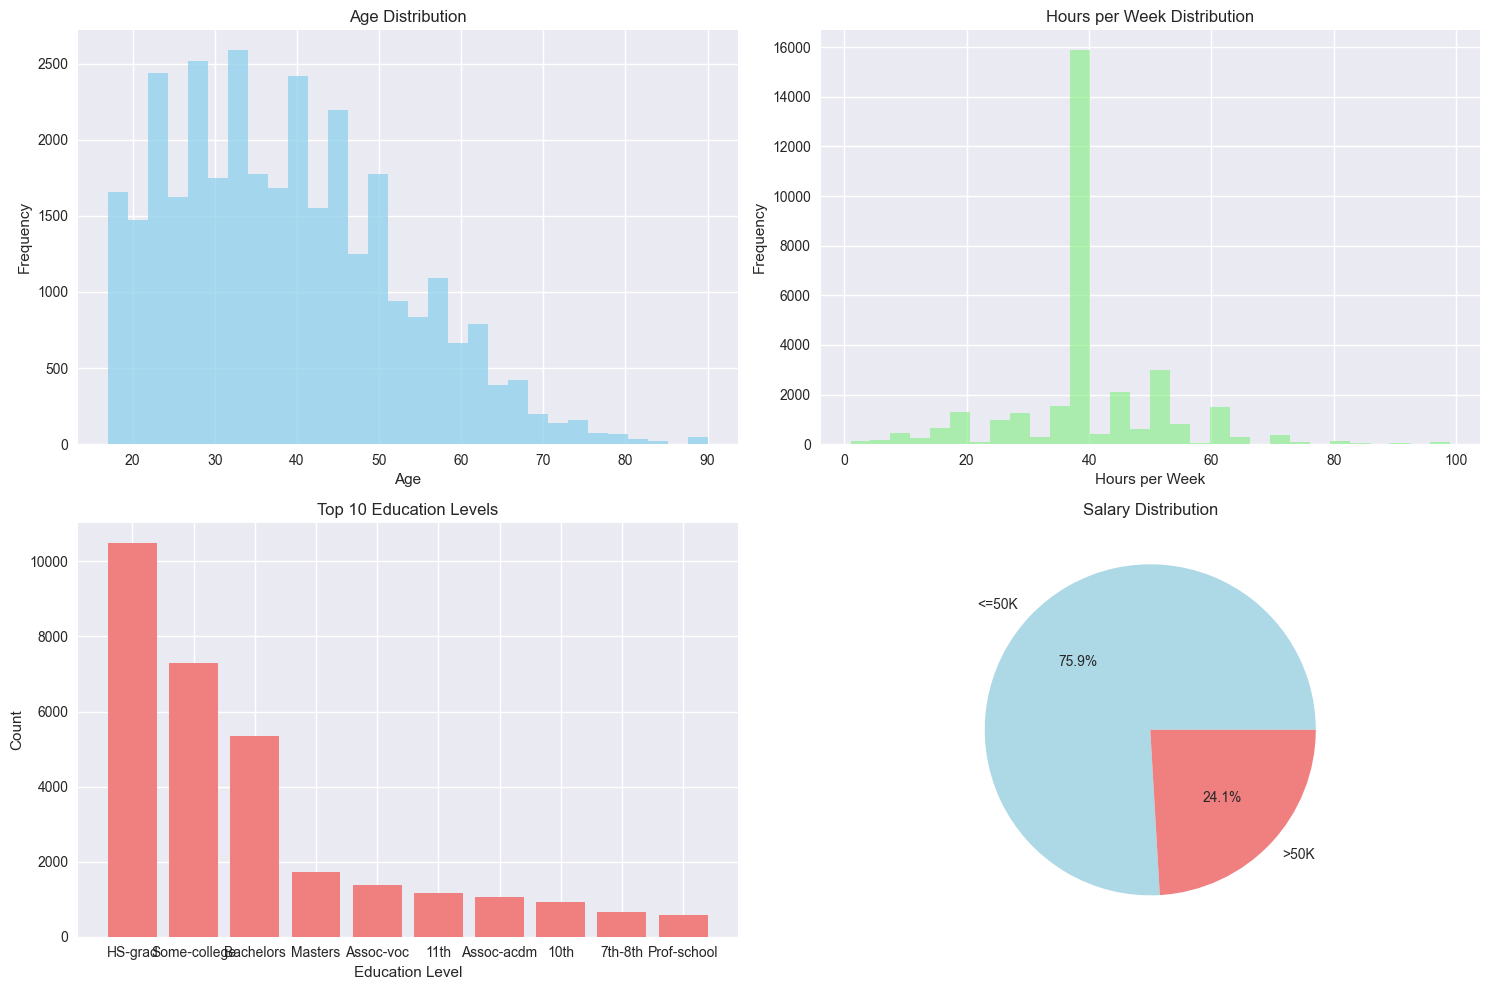

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
axes[0,0].hist(df_clean['age'], bins=30, alpha=0.7, color='skyblue')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Hours per week distribution
axes[0,1].hist(df_clean['hours-per-week'], bins=30, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Hours per Week Distribution')
axes[0,1].set_xlabel('Hours per Week')
axes[0,1].set_ylabel('Frequency')

# Education level distribution
education_counts = df_clean['education'].value_counts().head(10)
axes[1,0].bar(education_counts.index, education_counts.values, color='lightcoral')
axes[1,0].set_title('Top 10 Education Levels')
axes[1,0].set_xlabel('Education Level')
axes[1,0].set_ylabel('Count')
plt.xticks(rotation=45)

# Salary distribution
salary_counts = df_clean['salary'].value_counts()
axes[1,1].pie(salary_counts.values, labels=salary_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[1,1].set_title('Salary Distribution')

plt.tight_layout()
plt.show()

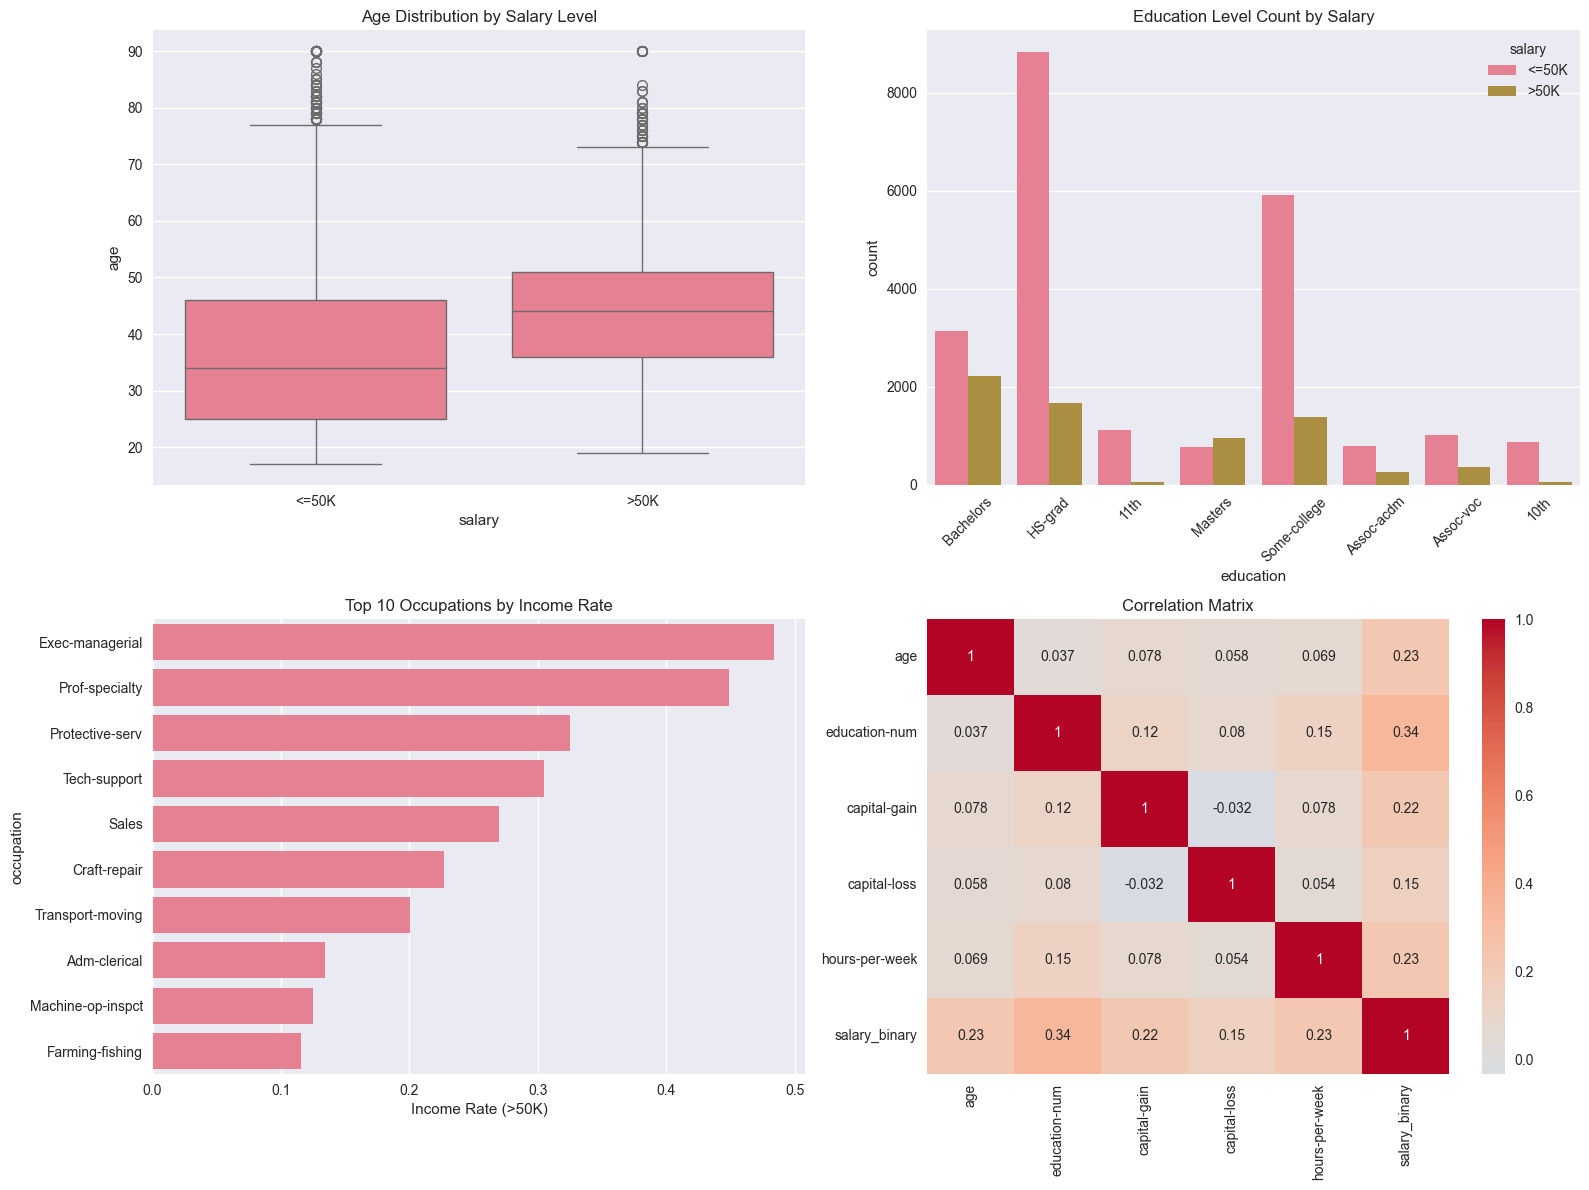

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Box plot: Age by salary
sns.boxplot(data=df_clean, x='salary', y='age', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Salary Level')

# Count plot: Education by salary
top_education = df_clean['education'].value_counts().head(8).index
education_subset = df_clean[df_clean['education'].isin(top_education)]
sns.countplot(data=education_subset, x='education', hue='salary', ax=axes[0,1])
axes[0,1].set_title('Education Level Count by Salary')
axes[0,1].tick_params(axis='x', rotation=45)

# Bar plot: Income rate by occupation
occupation_income = df_clean.groupby('occupation')['salary_binary'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=occupation_income.values, y=occupation_income.index, ax=axes[1,0])
axes[1,0].set_title('Top 10 Occupations by Income Rate')
axes[1,0].set_xlabel('Income Rate (>50K)')

# Heatmap: Correlation matrix
numeric_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary_binary']
correlation_matrix = df_clean[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

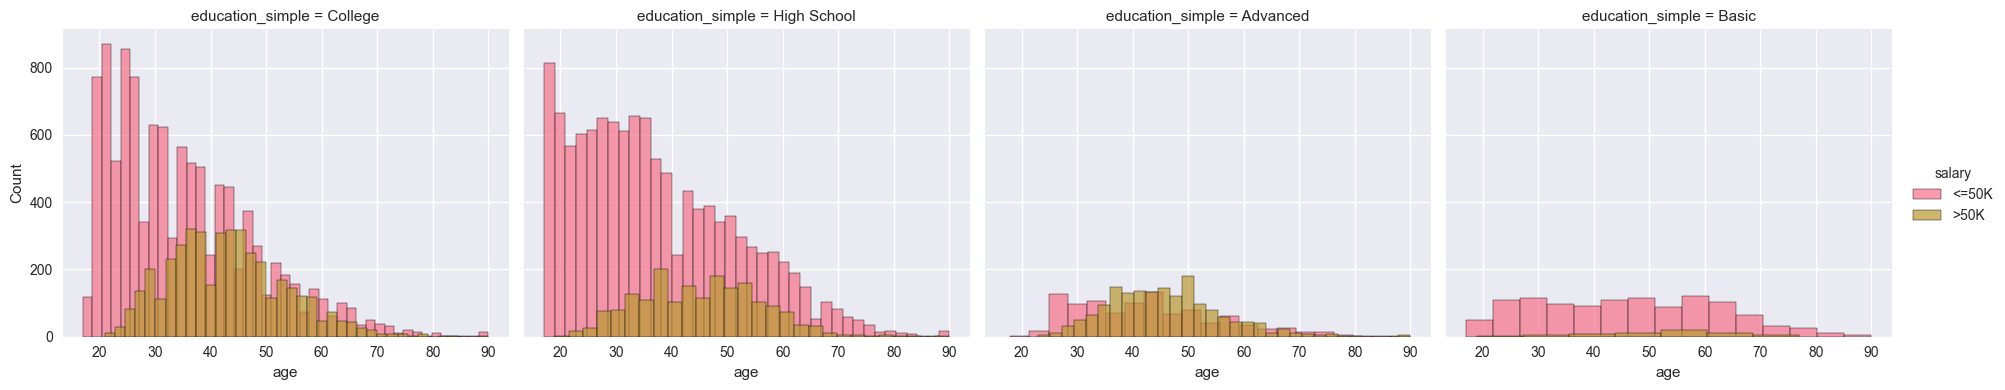

In [18]:
g = sns.FacetGrid(df_clean, col='education_simple', hue='salary', height=4, aspect=1.2)
g.map(sns.histplot, 'age', alpha=0.7, multiple='layer')
g.add_legend()
plt.show()

/tmp/ipykernel_1349/877776695.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age_sex = df_clean.groupby(['age_group', 'sex'])['salary_binary'].mean().unstack()


<Figure size 1200x800 with 0 Axes>

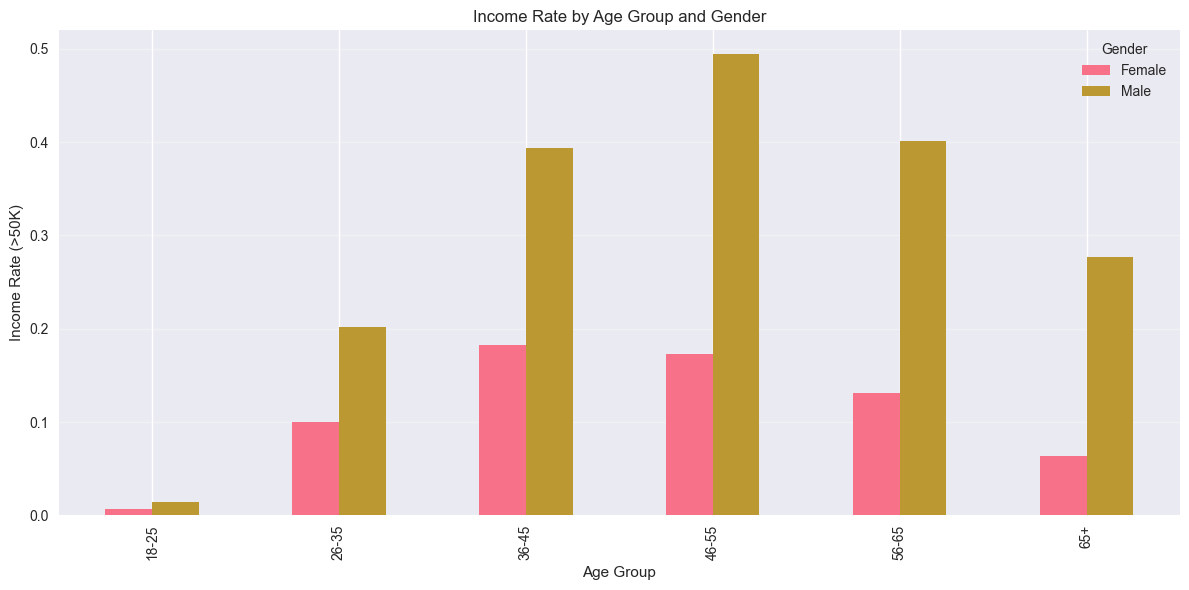

In [17]:
plt.figure(figsize=(12, 8))

income_by_age_sex = df_clean.groupby(['age_group', 'sex'])['salary_binary'].mean().unstack()

income_by_age_sex.plot(kind='bar', figsize=(12, 6))
plt.title('Income Rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Income Rate (>50K)')
plt.legend(title='Gender')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Key Thoughts

### Key Takeaways

1. **Data Exploration**: Always start by understanding your data structure, missing values, and basic statistics
2. **Data Cleaning**: Handle missing values, convert data types, and create useful features
3. **GroupBy Operations**: Powerful for aggregating data by categories
4. **Apply Functions**: Flexible way to create custom transformations
5. **Visualization**: Essential for understanding patterns and communicating insights

### Practice Exercises for Further Learning

1. Analyze the relationship between native country and income
2. Create a visualization showing the distribution of work hours by occupation
3. Build a composite score that combines education, age, and work experience
4. Compare income patterns between different racial groups
5. Create a dashboard with multiple linked visualizations

### Resources
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
- [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html)
- [Dataset Source](https://archive.ics.uci.edu/dataset/2/adult)